In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('StudentsPerformance.csv') #read csv

In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     1
reading score                  3
writing score                  1
dtype: int64

In [6]:
att_mean = df['math score'].mean()
df['math score'].fillna(att_mean, inplace= True)   # replace missing  values by mean value
df['math score'] = df['math score'].round(2)

In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  3
writing score                  1
dtype: int64

In [8]:
att_mean = df['reading score'].mean()
df['reading score'].fillna(att_mean, inplace= True)  # mean
df['reading score'] = df['reading score'].round(2)

In [9]:
att_mean = df['writing score'].mean()                    #mean
df['writing score'].fillna(att_mean, inplace= True)
df['writing score'] = df['writing score'].round(2)

In [10]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<AxesSubplot:>

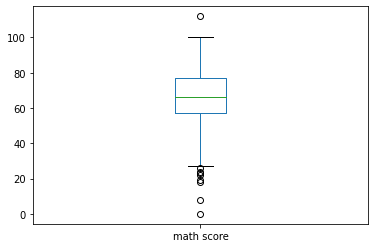

In [12]:
df['math score'].plot(kind='box')     #plot box-plot

<AxesSubplot:ylabel='Frequency'>

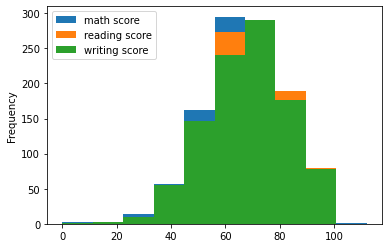

In [14]:
df.plot(kind='hist')                 #histogram

In [16]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)            #calculate q1,q3,IQR
IQR=q3-q1

In [17]:
IQR

math score       20.0
reading score    20.0
writing score    21.0
dtype: float64

In [19]:
LL= q1-(IQR*1.5)                 #calc lower limit and upper limit 
UL = q3+(IQR * 1.5)

In [20]:
LL


math score       27.0
reading score    29.0
writing score    26.5
dtype: float64

In [21]:
UL

math score       107.0
reading score    109.0
writing score    110.5
dtype: float64

In [22]:
low= df < LL   # outlier less than q1
low

,gender,lunch,math score,parental level of education,race/ethnicity,reading score,test preparation course,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [23]:
high= df > UL              #outliers greater than q3
high

,gender,lunch,math score,parental level of education,race/ethnicity,reading score,test preparation course,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [24]:
df.shape              

(1000, 8)

In [25]:
df[(low | high)]                      

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
out=df[~(low | high).any(axis=1)]            #dataset after removing outliers
out

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88.0,99.0,95.0
996,male,group C,high school,free/reduced,none,62.0,55.0,55.0
997,female,group C,high school,free/reduced,completed,59.0,71.0,65.0
998,female,group D,some college,standard,completed,68.0,78.0,77.0


-1000

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,10))                            #scaling math score (0-10)
df[['math score']] = scaler.fit_transform(df[['math score']])
df['math score'] = df['math score'].round(1)

In [30]:
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,6.4,72.0,74.0
1,female,group C,some college,standard,completed,6.2,90.0,88.0
2,female,group B,master's degree,standard,none,8.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,4.2,57.0,44.0
4,male,group C,some college,standard,none,6.8,78.0,75.0
5,female,group B,associate's degree,standard,none,6.3,83.0,78.0
6,female,group B,some college,standard,completed,7.9,95.0,92.0
7,male,group B,some college,free/reduced,none,3.6,43.0,39.0
8,male,group D,high school,free/reduced,completed,5.7,64.0,67.0
9,female,group B,high school,free/reduced,none,3.4,60.0,50.0


In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,10))
df[['writing score']] = scaler.fit_transform(df[['writing score']])
df['writing score'] = df['writing score'].round(1)

In [32]:
df.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,6.4,72.0,7.1
1,female,group C,some college,standard,completed,6.2,90.0,8.7
2,female,group B,master's degree,standard,none,8.0,95.0,9.2
3,male,group A,associate's degree,free/reduced,none,4.2,57.0,3.8
4,male,group C,some college,standard,none,6.8,78.0,7.2
5,female,group B,associate's degree,standard,none,6.3,83.0,7.6
6,female,group B,some college,standard,completed,7.9,95.0,9.1
7,male,group B,some college,free/reduced,none,3.6,43.0,3.2
8,male,group D,high school,free/reduced,completed,5.7,64.0,6.3
9,female,group B,high school,free/reduced,none,3.4,60.0,4.4
